# CNN

## Construir modelo de CNN

In [40]:
# Importar las librerias y paquetes

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling


In [64]:
# Inicializar la CNN

classifier = Sequential()

In [65]:
classifier.add( Rescaling( 1. / 255 ) )

# Convolucion
classifier.add( Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, padding = 'same', input_shape = (64, 64, 3), activation = 'relu') ) # 32 filtros de 3 x 3
    
# MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))   

# Convolucion
classifier.add( Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, padding = 'same', activation = 'relu') ) # 32 filtros de 3 x 3
    
# MaxPooling
classifier.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'same'))   
    
# Flattening
classifier.add(Flatten())    
    
# Full connection
classifier.add( Dense(units = 128, activation = 'relu' ) )  
classifier.add( Dropout(0.5))
classifier.add( Dense(units = 1, activation = 'sigmoid' ) )

# Compilar la CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



## Ajustar la CNN a las imagenes para entrenar

In [66]:
# Cargando imagenes para entrenamiento y para test

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

train =  tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/training_set",
    seed=1337,
    image_size= (64, 64),
    batch_size= 32,
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/test_set",
    seed = 1337,
    image_size = (64,64),
    batch_size = 32
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


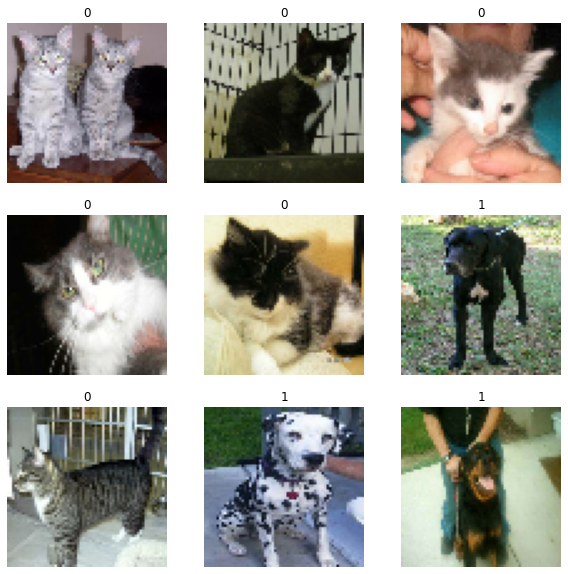

In [67]:
# Visualizando algunos datos

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [68]:
# Usando data augmentation

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

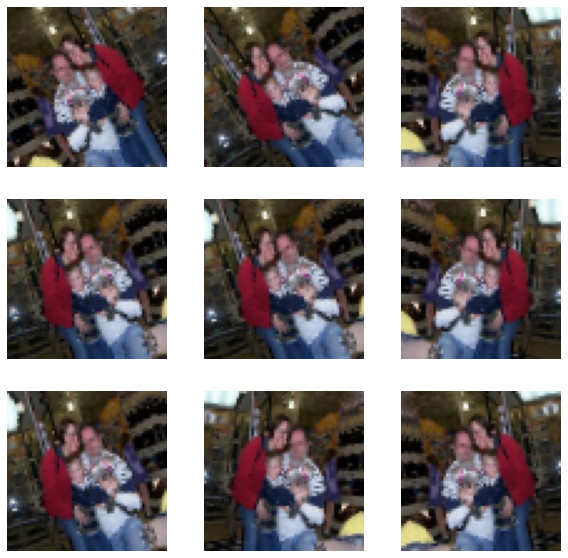

In [69]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [70]:
augmented_train = train.map(
  lambda x, y: (data_augmentation(x, training=True), y))


In [72]:
classifier.fit( augmented_train, epochs = 50, validation_data = test) # step_per_epoch = 8000, validation_step = 2000

Epoch 1/50
250/250 [==============================] - 21s 82ms/step - loss: 0.6099 - accuracy: 0.6675 - val_loss: 0.5721 - val_accuracy: 0.7090
Epoch 2/50
250/250 [==============================] - 20s 78ms/step - loss: 0.5823 - accuracy: 0.6924 - val_loss: 0.5558 - val_accuracy: 0.7240
Epoch 3/50
250/250 [==============================] - 20s 79ms/step - loss: 0.5592 - accuracy: 0.7089 - val_loss: 0.5723 - val_accuracy: 0.7080
Epoch 4/50
250/250 [==============================] - 20s 77ms/step - loss: 0.5485 - accuracy: 0.7180 - val_loss: 0.5312 - val_accuracy: 0.7460
Epoch 5/50
250/250 [==============================] - 14s 55ms/step - loss: 0.5356 - accuracy: 0.7284 - val_loss: 0.5110 - val_accuracy: 0.7470
Epoch 6/50
250/250 [==============================] - 15s 60ms/step - loss: 0.5234 - accuracy: 0.7442 - val_loss: 0.5295 - val_accuracy: 0.7345
Epoch 7/50
250/250 [==============================] - 15s 59ms/step - loss: 0.5057 - accuracy: 0.7527 - val_loss: 0.5096 - val_accuracy:

In [75]:
img = keras.preprocessing.image.load_img(
    "dataset/single_prediction/coco.jpg", target_size=(64,64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = classifier.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 12.39 percent cat and 87.61 percent dog.


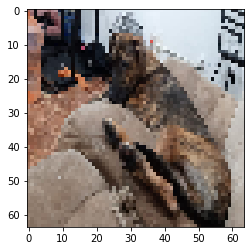

In [76]:
plt.imshow(img_array[0].numpy().astype("uint8"))